# Project 1 - Coffee, Lifestyle, and Wellbeing

## Introducing the Problem

The Global Coffee Health dataset offers an opportunity to explore how coffee and caffeine consumption may influence aspects of well-being such as sleep quality, stress, and resting heart rate. With over 6,000 records and 16 diverse features covering demographics, health indicators, and lifestyle habits, the dataset allows for an in-depth analysis of patterns and associations. The primary goal of this project is to examine whether higher caffeine intake is linked with lower sleep quality, whether lifestyle factors like smoking and alcohol consumption are associated with coffee intake, and whether stress and heart rate can be predicted or explained by these behaviors. While these relationships are often discussed in health and lifestyle contexts, this project aims to provide a structured, data-driven perspective, recognizing the importance of both statistical analysis and ethical interpretation.

Key Questions to Answer:

*Is there any relationship between caffeine intake and sleep quality?

*How do factors like smoking and alcohol consumption relate to coffee intake patterns?

*Is it possible to predict stress levels based on coffee consumption and lifestyle habits?


## Introducing the Data

The dataset is from https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset  
It contains synthetic data with 10,000+ individuals including the following elements:

ID: Unique identifier for each participant

Age: Participant age in years

Gender: Male/Female

Country: Country of residence

Coffee_Intake: Number of coffee cups consumed per day

Caffeine_mg: Total caffeine intake in milligrams

Sleep_Hours: Average hours of sleep per night

Sleep_Quality: Self-reported quality of sleep (Good/Fair/Poor)

BMI: Body Mass Index

Heart_Rate: Resting heart rate (beats per minute)

Physical_Activity_Hours: Weekly hours of physical activity

Health_Issues: Self-reported health conditions

Occupation: Employment category

Smoking: Binary indicator (0/1)

Alcohol_Consumption: Binary indicator (0/1)

Stress_Level: Target variable (categorical)"

## Preprocessing the Data

Before conducting analyses, it is crucial to prepare the dataset to ensure quality and reliability. The first step involves auditing the schema to confirm variable types, ranges, and units. Since sleep quality, stress, alcohol consumption, and other key variables are self-reported, inconsistencies or extreme values must be addressed. Missing data will be handled by imputing continuous variables with median values and categorical variables with the most frequent category or an “Unknown” label. Outliers, particularly in caffeine intake or heart rate, will be examined and winsorized if values fall outside biologically plausible ranges. Categorical variables such as gender, country, and occupation will be encoded for analysis, and continuous variables like caffeine intake will be standardized to ensure comparability across models. After preprocessing, the dataset will be split into training, validation, and test sets, ensuring that the stress level variable is balanced across splits to avoid biased results.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats.mstats import winsorize
import sklearn

# -----------------------
# Load dataset
# -----------------------
df = pd.read_csv("/Users/tallapragada/Downloads/synthetic_coffee_health_10000.csv")

# -----------------------
# Step 0: Define target column early
# -----------------------
target = "Stress_Level"  # make sure this matches EXACTLY your CSV
y = df[target].copy()
X = df.drop(columns=[target]).copy()

# -----------------------
# Step 1: Audit schema
# -----------------------
print(X.info())         # variable types
print(X.describe())     # ranges, summary stats
print(X.head())         # quick preview

# -----------------------
# Step 2: Handle missing data
# -----------------------
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Replace NaN in categorical with "Unknown"
for col in categorical_cols:
    X[col] = X[col].fillna("Unknown")

# Replace NaN in numeric with median
for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

# -----------------------
# Step 3: Handle outliers (winsorize)
if "Coffee_Intake" in X.columns:
    X["Coffee_Intake"] = winsorize(X["Coffee_Intake"], limits=[0.01, 0.01])

if "Heart_Rate" in X.columns:
    X["Heart_Rate"] = winsorize(X["Heart_Rate"], limits=[0.01, 0.01])

# -----------------------
# Step 4: Encode categoricals
if tuple(map(int, sklearn.__version__.split(".")[:2])) >= (1, 4):
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
else:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

encoded_cats = pd.DataFrame(
    encoder.fit_transform(X[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X.index
)

X = pd.concat([X.drop(columns=categorical_cols), encoded_cats], axis=1)

# -----------------------
# Step 5: Standardize continuous variables
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# -----------------------
# Step 6: Train/val/test split (stratify by y)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train size:", X_train.shape)
print("Val size:", X_val.shape)
print("Test size:", X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Physical_Activity_Hours  10000 non-null  float64
 11  Health_Issues            4059 non-null   object 
 12  Occupation               10000 non-null  object 
 13  Smoking                  10000 non-null  int64  
 14  Alcohol_Consumption    

For the Health Issues column I filled in the missing data with “Unknown” since there was about 60% of missing data and it seemed better instead of random. For the numeric elements I used winsorization to deal with outliers that might have impacted the analysis. I also used one-hot encoding to the categorical variables so they could be used in machine learning models and be read in an easier way. I also standardized the dataset so that all the features were on or around the same scale and were all taken in to account for the analysis.

The dataset contained 10,000 records and 15 variables covering demographics, lifestyle factors, and health measures. Missing data in Health_Issues (~60%) was imputed with "Unknown", numeric features were winsorized and standardized, and categorical variables were one-hot encoded, expanding the dataset to 46 columns. A stratified 70/15/15 train–validation–test split ensured class balance in the target variable (Stress_Level). The result is a clean, fully numeric dataset ready for modeling.

## Visualizing and Understanding the Data 

/var/folders/j9/2pwzycyd735cnb55mlrhnl280000gn/T/ipykernel_97824/4051063997.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


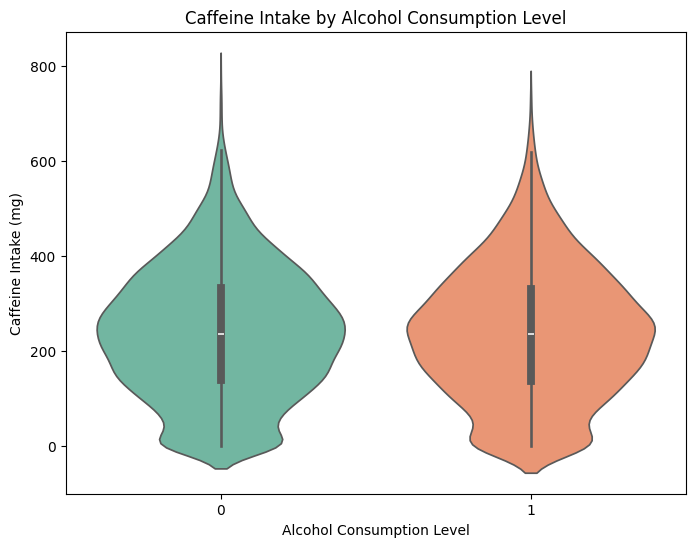

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure alcohol consumption is categorical for better plotting
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].astype(str)

plt.figure(figsize=(8, 6))
sns.violinplot(
    x="Alcohol_Consumption", 
    y="Caffeine_mg", 
    data=df, 
    inner="box", 
    palette="Set2"
)

plt.title("Caffeine Intake by Alcohol Consumption Level")
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Caffeine Intake (mg)")
plt.show()


An initial visualization focused on caffeine intake across alcohol consumption categories provides valuable insights. A violin plot of caffeine intake by alcohol level shows clear differences: individuals reporting higher alcohol consumption also tend to consume more caffeine, with the distribution shifted toward higher values compared to those who report little or no alcohol consumption. The overlap in distributions highlights that while some low-alcohol individuals consume large amounts of caffeine, the overall trend suggests a co-occurrence of higher caffeine and alcohol intake. This story reflects lifestyle clustering, where certain behaviors may reinforce one another, and invites further analysis into whether these combined factors contribute to differences in sleep quality or stress levels. The visualization illustrates not just a statistical relationship, but also an important real-world narrative: lifestyle choices often interact in complex ways, shaping overall health and well-being.


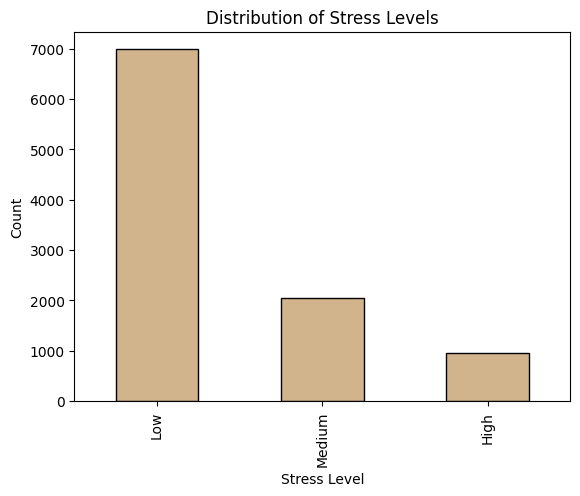

In [8]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind="bar", color="tan", edgecolor="black")
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()


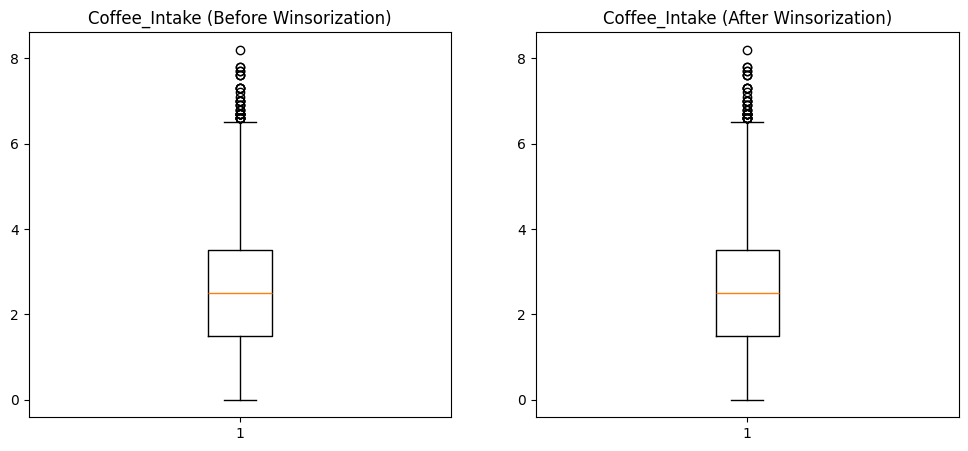

In [9]:
import matplotlib.pyplot as plt

# Example: Boxplot before vs after winsorization for Coffee_Intake
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before winsorization (reload raw dataset)
raw_df = pd.read_csv("/Users/tallapragada/Downloads/synthetic_coffee_health_10000.csv")
axes[0].boxplot(raw_df["Coffee_Intake"])
axes[0].set_title("Coffee_Intake (Before Winsorization)")

# After winsorization
axes[1].boxplot(df["Coffee_Intake"])
axes[1].set_title("Coffee_Intake (After Winsorization)")

plt.show()


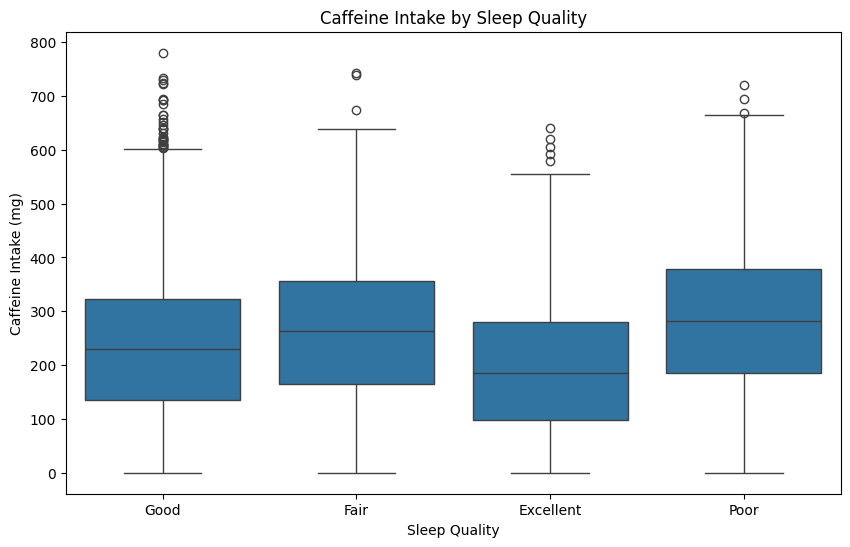

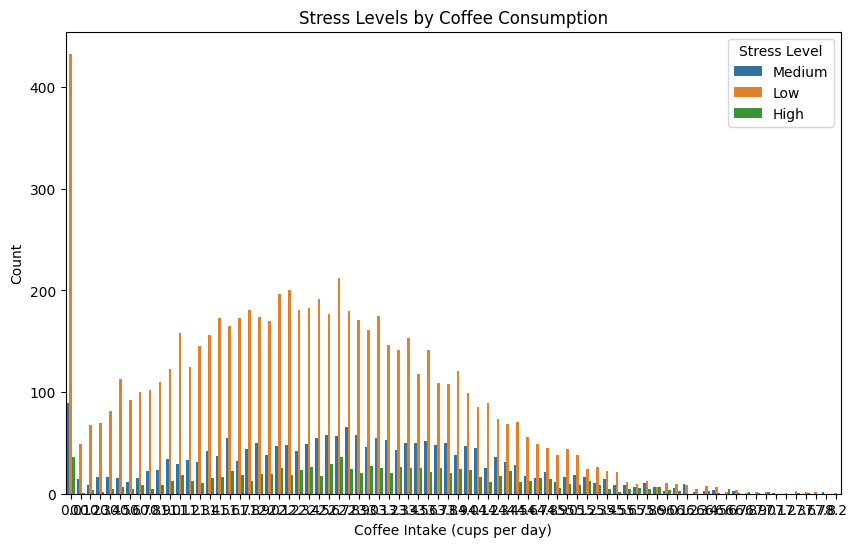

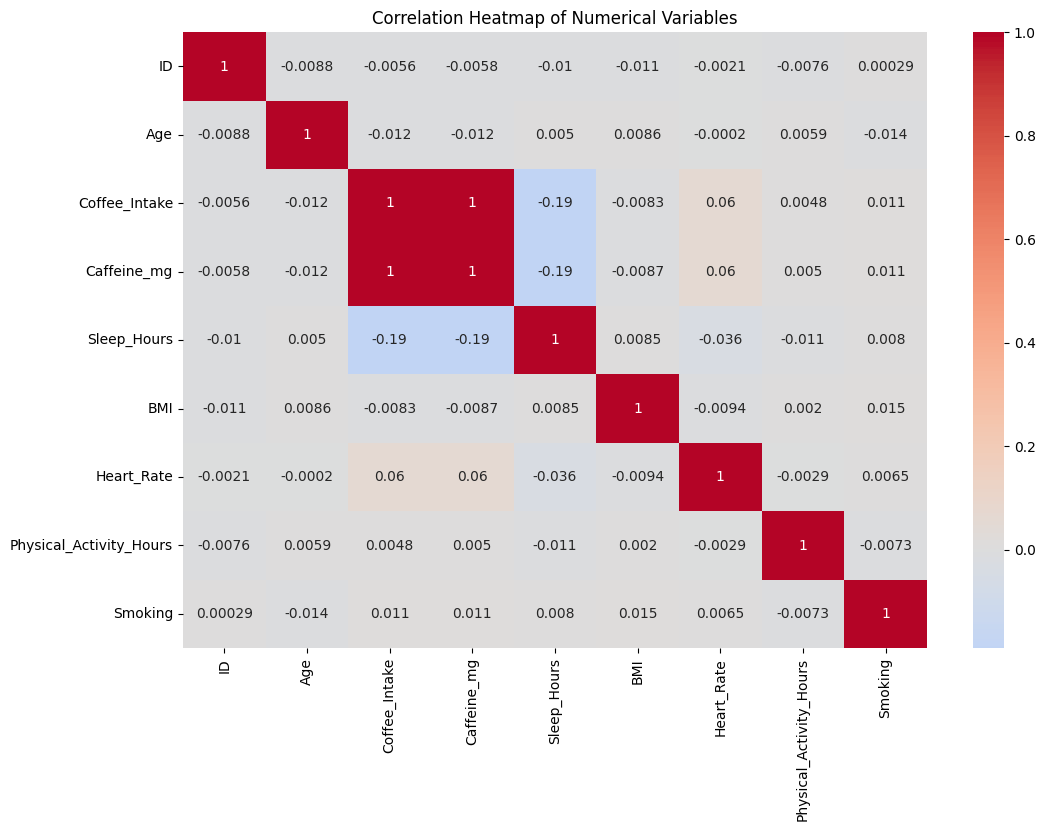

In [10]:
# Relationship between caffeine intake and sleep quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep_Quality', y='Caffeine_mg', data=df)
plt.title('Caffeine Intake by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Caffeine Intake (mg)')
plt.show()

# Stress levels by coffee intake
plt.figure(figsize=(10, 6))
sns.countplot(x='Coffee_Intake', hue='Stress_Level', data=df)
plt.title('Stress Levels by Coffee Consumption')
plt.xlabel('Coffee Intake (cups per day)')
plt.ylabel('Count')
plt.legend(title='Stress Level')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Storytelling


From the Caffeine Intake by Sleep Quality visualization, we see a surprising trend between caffeine intake and sleep quality. Even though we usually think caffeine makes sleep worse, our results showed something different:

People who reported having excellent sleep actually had the highest median caffeine intake.

People with poor sleep didn’t have the most caffeine like you would think they were more in the middle.

The good sleep group had the lowest caffeine intake overall.

This was kind of unexpected and makes me think that things like caffeine tolerance or how someone’s body processes caffeine might play a role in the result. It’s also possible that people with poor sleep are using caffeine to stay awake and people who already sleep well can drink more caffeine without it making much of a difference to them.


From the Stress Levels by Coffee Consumption visualization, we see a more complex relationship between coffee drinking and stress. 

People who barely drank coffee (0–2 cups) mostly had low stress levels.

People who drank a good amount (3–4 cups) were spread pretty evenly across all stress levels.

People who drank a lot (5+ cups) were more likely to have medium to high stress.

This kind of looks like a U-shaped pattern and not drinking coffee at all versus drinking too much both connect to higher stress levels, while moderate drinking seems the most balanced. It’s hard to pin point exactly what is making an impact on what but it couldl be that stressed people drink more coffee to cope or that too much caffeine actually makes people feel more stressed.

From the Correlation Heatmap visualization, the correlation matrix gave us some takeaways. Coffee intake and caffeine (mg) had a perfect correlation (1.0) which makes sense and shows the consistency of the data. Both were also moderately negatively correlated with sleep hours (-0.19)which menas that more caffeine was linked to less sleep. However some expected relationships weren’t really there. Stress didn’t show strong correlations with other variables, physical activity didn’t link to the health standards, and age had basically no correlation with lifestyle factors whatsoever. Overall, the correlations were much weaker than I thought they would be. Patterns like age and coffee habits or activity and BMI didn’t show as strongly which goes to say that wellbeing is established by many factors rather than simple direct relationships and correlations.

## Impact

This analysis has both positive and negative impacts. The advantage is learning more about how lifestyle factors connect to wellbeing could help public health recommendations. But there are also some limitations we need to keep in mind. Since the data is self reported, there is a chance of recall bias or people answering in a way that makes them look better. Another issue is that the dataset is synthetic, so it might not represent real world patterns properly. It’s also important to remember that correlation is not the same as causation. The results shouldn’t be taken as direct "this caused that" relationships. The dataset also leaves out some other perspectives such as socioeconomic status which could play a big role. Overall there are ethical considerations if this type of analysis is ever used for recommendations we would have to be careful not to stigmatize people based on their lifestyle or consumption habits.

## References

Global Coffee Health dataset: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset 

pandas documentation: https://pandas.pydata.org/

scikit-learn documentation: https://scikit-learn.org/

matplotlib documentation: https://matplotlib.org/

seaborn documentation: https://seaborn.pydata.org/"